In [1]:
import pandas as pd

In [138]:
df = pd.DataFrame.from_csv('shangoda_obokh.csv', sep=';', index_col=None)

In [139]:
#villages = sorted(set(df['village']))
#vill_dict = {name: i for i, name in enumerate(villages)}

In [140]:
col_list = ['female', 'year_of_birth','multiling_withoutrus', 'close_multiling','lak','azeri','kumyk','dargwa', 'avar','far_multiling','rus','multiling']
#df['village_int'] = df['village'].apply(lambda x: vill_dict[x])
for x in col_list:
    try:
        df[x] = df[x].apply(int)
    except:
        print('failure on {}'.format(x))

In [141]:
df = df[col_list]

In [142]:
df

,female,year_of_birth,multiling_withoutrus,close_multiling,lak,azeri,kumyk,dargwa,avar,far_multiling,rus,multiling
0,0,1950,0,0,0,0,0,0,0,0,0,0
1,1,1956,0,0,0,0,0,0,0,0,0,0
2,1,1957,0,0,0,0,0,0,0,0,0,0
3,1,1959,0,0,0,0,0,0,0,0,0,0
4,0,1967,0,0,0,0,0,0,0,0,0,0
5,0,1855,1,1,1,0,0,0,0,0,0,1
6,0,1880,2,1,1,0,1,0,0,1,0,2
7,0,1881,1,1,1,0,0,0,0,0,0,1
8,1,1881,1,1,1,0,0,0,0,0,0,1
9,1,1886,1,1,1,0,0,0,0,0,0,1


In [143]:
def split_by_decade(df, n=10):
    result = {}
    start = min(df['year_of_birth']) - min(df['year_of_birth']) % n
    finish = max(df['year_of_birth']) - max(df['year_of_birth']) % n
    x = start
    while x + n <= finish:
        result[x] = df.query('{} < year_of_birth < {}'.format(x, x + n))
        x += n
    return result

In [144]:
# years = sorted(set(df['year_of_birth']))
# result = {}
# for x in years:
#    result[x] = df.query('{} == year_of_birth'.format(x))

In [145]:
decade_split = split_by_decade(df)

In [146]:
from collections import Counter

def df_to_plottable(df, field='lak'):
    female = df[df['female'] == 1]
    male = df[df['female'] == 0]
    female_counter = Counter(list(female[field]))
    male_counter = Counter(list(male[field]))
#     return male_counter, female_counter
    return counter_to_xy(male_counter), counter_to_xy(female_counter)

# для всех
def df_to_plottable1(df, field='rus'):
    female_counter = Counter(list(df[field]))
#     return male_counter, female_counter
    return counter_to_xy(female_counter)
    
def counter_to_xy(counter):
    xs = [0, 1, 2, 3, 4, 5, 6]
    ys = [(counter[x]/(sum(counter.values()) or 1)) for x in xs]
    return xs, ys

In [147]:
df_to_plottable(decade_split[1890])

(([0, 1, 2, 3, 4, 5, 6], [0.4, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ([0, 1, 2, 3, 4, 5, 6],
  [0.6666666666666666, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0]))

In [148]:

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("RdBu_r") # or "hls"
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline
# %pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = (8, 6)

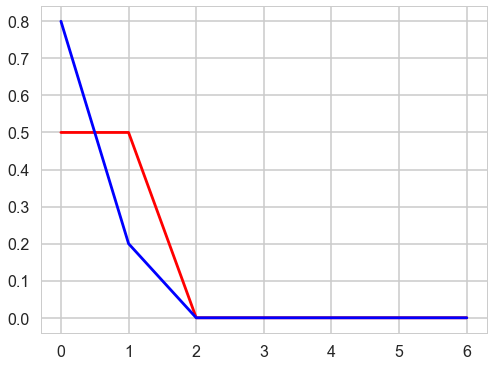

In [149]:
# по декадам
for x in decade_split:
    pm, pf = df_to_plottable(decade_split[x])
    plt.clf()
    plt.plot(pm[0], pm[1], color='red')
    plt.plot(pf[0], pf[1], color='blue')
    plt.savefig('{}.png'.format(x))

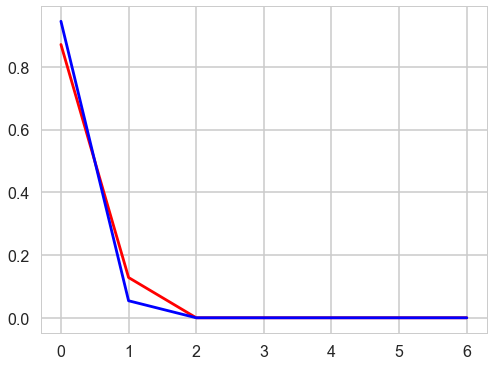

In [108]:
# по всему датафрейму
pm, pf = df_to_plottable(df)
plt.clf()
plt.plot(pm[0], pm[1], color='red')
plt.plot(pf[0], pf[1], color='blue')
plt.savefig('male_dargwa.png')

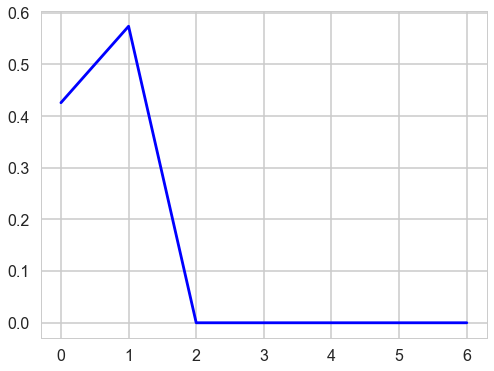

In [109]:
# без гендера
pf = df_to_plottable1(df)
plt.clf()
plt.plot(pf[0], pf[1], color='blue')
plt.savefig('pers_nogender_rus.png')

In [117]:
1992 - 1992 % 10

1990

In [7]:
import numpy as np

In [15]:
from sklearn.model_selection import train_test_split

def split_df(df):
    """returns x_train, x_test, y_train, y_test"""
    y = df['multilang']
    x = df[list(set(col_list) - {'multilang'})].as_matrix()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    return x_train, x_test, y_train, y_test

def split_by_year(df, year):
    return df[df['year_of_birth'] <= year], df[df['year_of_birth'] > year]

def check_quality(predictor, x_test, y_test):
    predicted = predictor.predict(x_test)
    y_test = np.array(y_test)
    return sum(int(round(predicted[i]) == round(y_test[i])) for i in range(len(y_test))) / len(y_test)

In [9]:
x_train, x_test, y_train, y_test = split_df(df)

In [10]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=30).fit(x_train, y_train)
check_quality(rfc, x_test, y_test)

0.5155709342560554

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=250, verbose=True).fit(x_train, y_train)
check_quality(gbc, x_test, y_test)

      Iter       Train Loss   Remaining Time 
         1        4046.9734            3.93s
         2        3792.6356            4.66s
         3        3595.0655            4.77s
         4        3431.6749            4.81s
         5        3297.6430            4.66s
         6        3182.1025            4.49s
         7        3085.5537            4.52s
         8        3000.4993            4.40s
         9        2928.8310            4.27s
        10        2867.6513            4.17s
        20        2487.5684            3.60s
        30        2312.8445            3.31s
        40        2203.8219            3.10s
        50        2125.5843            3.03s
        60        2064.6249            2.90s
        70        2013.3271            2.70s
        80        1967.0847            2.53s
        90        1922.8135            2.36s
       100        1884.2261            2.40s
       200        1619.6018            0.74s


0.5709342560553633

In [12]:
from sklearn.svm import SVC

svc = SVC().fit(x_train, y_train)
check_quality(svc, x_test, y_test)

0.5294117647058824

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
check_quality(knc, x_test, y_test)

0.48788927335640137

In [17]:
from sklearn.linear_model import Perceptron

p = Perceptron().fit(x_train, y_train)
check_quality(p, x_test, y_test)

0.27335640138408307

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(x_train, y_train)
check_quality(dtc, x_test, y_test)

0.47923875432525953